In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
def list_directory_tree_with_os_walk(starting_directory):
    for root, directories, files in os.walk(starting_directory):
        print(f"Directory: {root}")
        for file in files:
            print(f"  File: {file}")

list_directory_tree_with_os_walk('.')

Directory: .
  File: dora.ipynb
  File: pycaret_requirements.txt
  File: model_stack.ipynb
  File: pipeline.py
  File: conda_install.py
  File: sandbox.ipynb
  File: data.ipynb
Directory: ./__pycache__
  File: Master.cpython-311.pyc
Directory: ./mlruns
Directory: ./mlruns/611117490819662990
  File: meta.yaml
Directory: ./mlruns/611117490819662990/d74a40f813d84bd395482ab89ad6b44b
  File: meta.yaml
Directory: ./mlruns/611117490819662990/d74a40f813d84bd395482ab89ad6b44b/metrics
  File: RMSLE
  File: MAPE
  File: MAE
  File: MSE
  File: TT
  File: R2
  File: RMSE
Directory: ./mlruns/611117490819662990/d74a40f813d84bd395482ab89ad6b44b/artifacts
  File: Results.html
Directory: ./mlruns/611117490819662990/d74a40f813d84bd395482ab89ad6b44b/artifacts/model
  File: python_env.yaml
  File: requirements.txt
  File: MLmodel
  File: model.pkl
  File: conda.yaml
Directory: ./mlruns/611117490819662990/d74a40f813d84bd395482ab89ad6b44b/tags
  File: mlflow.parentRunId
  File: USI
  File: Run Time
  File: 

In [3]:
# Estimate
X_train_estimated_a = pd.read_parquet("../A/X_train_estimated.parquet")
X_train_estimated_b = pd.read_parquet("../B/X_train_estimated.parquet")
X_train_estimated_c = pd.read_parquet("../C/X_train_estimated.parquet")

# Test estimates
X_test_estimated_a = pd.read_parquet("../A/X_test_estimated.parquet")
X_test_estimated_b = pd.read_parquet("../B/X_test_estimated.parquet")
X_test_estimated_c = pd.read_parquet("../C/X_test_estimated.parquet")

# Full test estimate
X_test_A = pd.read_parquet("../A/X_test_A.parquet")
X_test_B = pd.read_parquet("../B/X_test_B.parquet")
X_test_C = pd.read_parquet("../C/X_test_C.parquet")

test_df = pd.read_csv("../test.csv")

# Observations
X_train_observed_a = pd.read_parquet("../A/X_train_observed.parquet")
X_train_observed_b = pd.read_parquet("../B/X_train_observed.parquet")
X_train_observed_c = pd.read_parquet("../C/X_train_observed.parquet")

# Targets
Y_train_observed_a = pd.read_parquet("../A/train_targets.parquet")
Y_train_observed_b = pd.read_parquet("../B/train_targets.parquet")
Y_train_observed_c = pd.read_parquet("../C/train_targets.parquet")

In [4]:
# Plotting a single feature
if (False):
    fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
    feature_name = 'absolute_humidity_2m:gm3'
    X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
    X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
    X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')

    X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
    X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
    X_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

    X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
    X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
    X_test_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')

In [5]:
import sys
print(sys.path.append(sys.path[0][0:-4] + 'mikael'))
# print(sys.path)
# from ..mikael import Master
from Master import MasterDataframes
# make notebook reload modules when code is changed or anything is run
%load_ext autoreload

None


In [6]:
mdf = MasterDataframes()
df_a = mdf.df_a
# X_A, Y_A = mdf.prep_dataset_x_y("A")
X, Y = mdf.prep_dataset_x_y("A")
X

/Users/matsalexander/Desktop/Forest Gump/mikael/Master.py:63: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  X_train_group = X_train_total.groupby(pd.Grouper(key="date_forecast", freq="1H")).mean().reset_index()
/Users/matsalexander/Desktop/Forest Gump/mikael/Master.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inner_to_split[categorical_columns].fillna(0, inplace=True)
/Users/matsalexander/Desktop/Forest Gump/mikael/Master.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,year,month,hours,since_jan_1,effective_energy
0,7.700,1.22825,1728.949951,0.000000,0.000,1728.949951,0.0,280.299988,0.000,0.000000,0.00,0.000000,99.074997,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1006.299988,0.0,0.0,993.750000,999.775024,0.0,0.000,71.674995,1005.799988,NaN,0.0,0.0,0.0,0.175,348.036743,-3.77425,0.000,286.225006,100.000000,40386.476562,3.600,-3.575,-0.500,0.0,2019.0,6.0,22.0,152.0,0.000000
1,7.700,1.22350,1689.824951,0.000000,0.000,1689.824951,0.0,280.299988,0.000,0.000000,0.00,0.000000,99.750000,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1005.200012,0.0,0.0,992.674988,998.650024,0.0,0.025,68.000000,1004.650024,NaN,0.0,0.0,0.0,0.200,91.980751,-4.35725,0.000,286.899994,100.000000,33770.648438,3.350,-3.350,0.275,0.0,2019.0,6.0,23.0,152.0,0.000000
2,7.875,1.21975,1563.224976,0.000000,0.000,1563.224976,0.0,280.649994,0.000,0.000000,0.00,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1004.525024,0.0,0.0,992.000000,997.974976,0.0,0.100,67.949997,1003.950012,NaN,0.0,0.0,0.0,0.400,14.934750,-3.30950,0.000,286.950012,100.000000,13595.500000,3.050,-2.950,0.750,0.0,2019.0,6.0,0.0,153.0,0.000000
3,8.425,1.21800,1283.425049,208.649994,0.750,1283.425049,0.0,281.674988,0.300,526.775024,0.00,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.25,1.00,1004.025024,0.0,0.0,991.500000,997.449951,0.0,0.125,73.875000,1003.449951,NaN,0.0,0.0,0.0,0.550,28.630251,-0.82250,0.000,286.750000,100.000000,2321.850098,2.725,-2.600,0.875,0.0,2019.0,6.0,1.0,153.0,0.750000
4,8.950,1.21800,1003.500000,32468.150391,23.100,1003.500000,0.0,282.500000,11.975,22068.949219,0.15,282.975006,84.875000,6.0,0.0,0.0,0.0,0.0,0.0,1.00,0.00,1003.099976,0.0,0.0,990.550049,996.500000,0.0,0.100,79.925003,1002.500000,NaN,0.0,0.0,0.0,0.250,41.997501,3.05125,0.000,286.450012,99.224998,11634.799805,2.550,-2.350,0.925,0.0,2019.0,6.0,2.0,153.0,22.920975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34080,4.550,1.27650,1674.199951,84464.945312,4.225,542.700012,0.0,272.424988,2.825,56431.050781,0.10,13230.649414,96.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.50,0.75,1014.750000,0.0,0.0,1001.574951,1007.799988,0.0,0.000,74.625000,1014.049988,NaN,0.0,0.0,0.0,0.000,304.939240,-0.18050,0.000,275.024994,96.699997,23417.074219,5.175,4.800,1.925,0.0,2023.0,4.0,19.0,119.0,4.085575
34081,4.500,1.27975,1762.400024,2270.875000,0.000,546.400024,0.0,272.299988,0.000,5067.875000,0.00,176.350006,94.224998,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1014.700012,0.0,0.0,1001.549988,1007.799988,0.0,0.000,76.875000,1014.049988,NaN,0.0,0.0,0.0,0.000,318.625763,-5.17600,0.000,274.650024,94.525002,21084.050781,4.650,4.025,2.300,0.0,2023.0,4.0,20.0,119.0,0.000000
34082,4.500,1.28100,1696.650024,0.000000,0.000,548.349976,0.0,272.299988,0.000,0.000000,0.00,0.000000,94.324997,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1014.549988,0.0,0.0,1001.400024,1007.674988,0.0,0.000,77.775002,1013.925049,NaN,0.0,0.0,0.0,0.000,332.785736,-8.95075,0.000,274.524994,95.675003,20792.500000,4.450,3.575,2.600,0.0,2023.0,4.0,21.0,119.0,0.000000
34083,4.500,1.28100,1353.400024,0.000000,0.000,527.775024,0.0,272.299988,0.000,0.000

In [7]:
# Transform catagorical features to numerical. Be careful that you you specify that there is no order for the catagorical features

# import sklearn
# from sklearn.preprocessing import labelEncoder
# import autoML
# le = labelEncoder()
# df["catagorical column"] = le.fit_transform(df["catagorical column"])

<h1> halla </h1>

In [8]:
# X, Y = X.to_numpy(), Y.to_numpy()

# import autosklearn
# import sklearn.model_selection
# load sample dataset
from pycaret.regression import *
merged_df = pd.concat([X, Y], axis=1)
categoriacal_features = [c for c in merged_df.columns if ":idx" in c]

categoriacal_features

# merged_df['date_column'] = pd.to_datetime(
#     {
#         'year': merged_df['year'],
#         'month': merged_df['month'],
#         'day': merged_df['since_jan_1'],  # Assuming 'since_jan_1' represents the day of the year
#         'hour': merged_df['hours']
#     },
#     format='%Y-%m-%d %H'  # Specify the format of the datetime
# )


['dew_or_rime:idx',
 'is_day:idx',
 'is_in_shadow:idx',
 'precip_type_5min:idx',
 'snow_drift:idx']

In [32]:
s = setup(merged_df, target="pv_measurement", normalize=True, categorical_features=categoriacal_features, experiment_name="pv_power_mw")


,Description,Value
0,Session id,2070
1,Target,pv_measurement
2,Target type,Regression
3,Original data shape,"(34085, 51)"
4,Transformed data shape,"(34085, 79)"
5,Transformed train set shape,"(23859, 79)"
6,Transformed test set shape,"(10226, 79)"
7,Numeric features,45
8,Categorical features,5
9,Rows with missing values,97.4%


In [10]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,182.5939,162112.9319,402.2992,0.8800,1.1717,1.2854,0.5030
et,Extra Trees Regressor,181.3866,164140.6495,404.8499,0.8784,0.5968,1.2338,1.2030
xgboost,Extreme Gradient Boosting,188.1153,168843.5016,410.6681,0.8750,1.5476,2.0494,0.2140
rf,Random Forest Regressor,186.0528,172216.7202,414.6870,0.8725,0.6057,1.2714,3.6420
gbr,Gradient Boosting Regressor,207.5628,191362.7380,437.0973,0.8583,1.8612,3.0017,1.6790
lr,Linear Regression,257.7516,225299.0384,474.2558,0.8332,2.8859,6.1832,0.1890
ridge,Ridge Regression,257.7231,225386.1048,474.3480,0.8332,2.8861,6.1671,0.0410
br,Bayesian Ridge,255.3060,225982.4262,474.9723,0.8327,2.8495,5.6846,0.0610
llar,Lasso Least Angle Regression,255.0103,226166.0146,475.1626,0.8326,2.8490,5.6211,0.0410
lasso,Lasso Regression,255.0053,226162.4217,475.1582,0.8326,2.8493,5.6228,0.2540


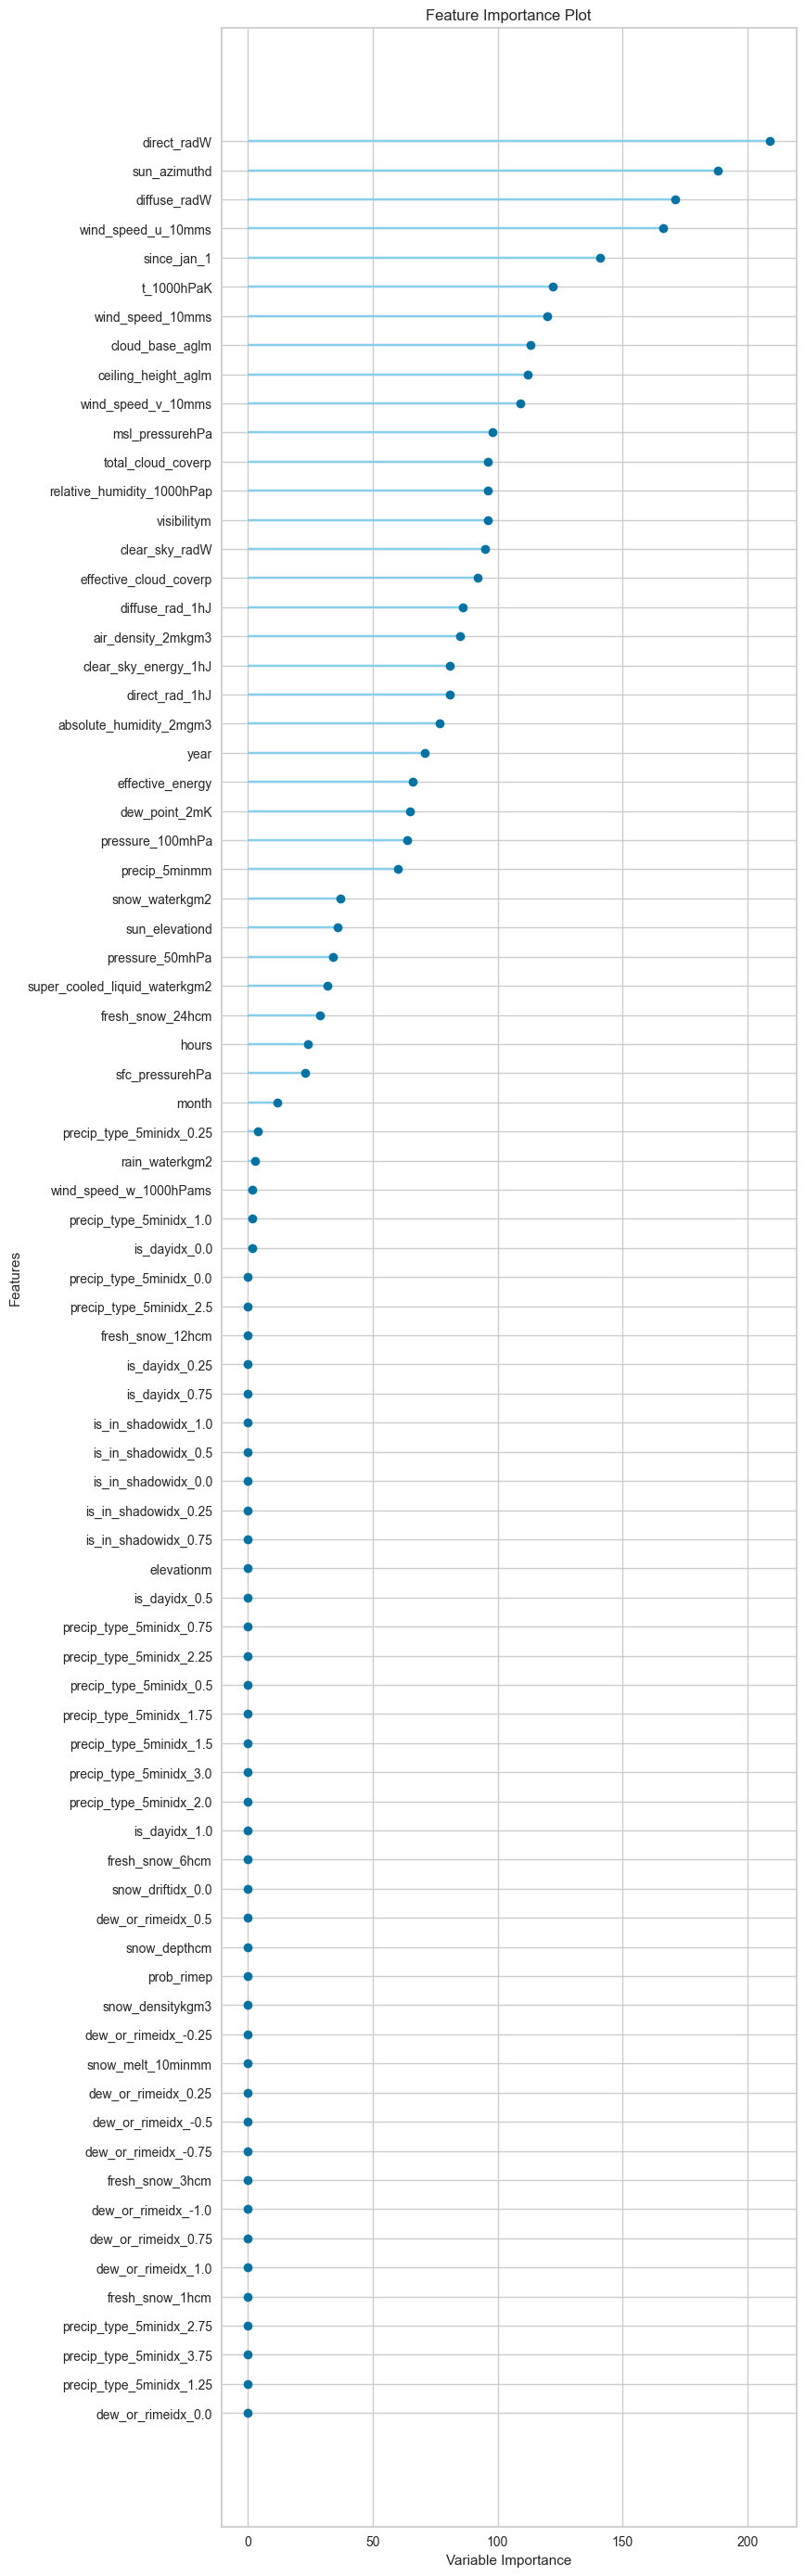

In [24]:
# check the residuals of trained model
# plot_model(best, plot = 'residuals_interactive')
plot_model(best, plot = 'feature_all')
# plot_model(best, plot = 'error')


In [12]:
print(best)

LGBMRegressor(n_jobs=-1, random_state=123)


In [13]:
finalize_model(best)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['absolute_humidity_2m:gm3',
                                             'air_density_2m:kgm3',
                                             'ceiling_height_agl:m',
                                             'clear_sky_energy_1h:J',
                                             'clear_sky_rad:W',
                                             'cloud_base_agl:m',
                                             'dew_point_2m:K', 'diffuse_rad:W',
                                             'diffuse_rad_1h:J', 'direct_rad:W',
                                             'direct_rad_1h:J',
                                             'effective_cloud_cover:p',
                                             'elevation:m...
                                             'precip_type_5min:idx',
                                             'snow_drift:idx'],
                                    transformer=OneHotEncoder(cols=['dew_or_rime:idx',
                                                                    'is_day:idx',
                                                                    'is_in_shadow:idx',
                                                                    'precip_type_5min:idx',
                                                                    'snow_drift:idx'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 LGBMRegressor(n_jobs=-1, random_state=123))])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

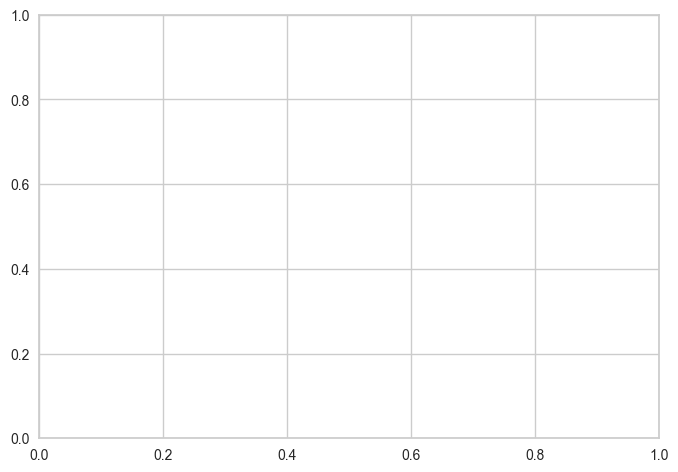

In [14]:
evaluate_model(best)

In [15]:
# stacker = stack_models(compare_models(n_select = 3))

<h1> this is the stack </h1>
StackingRegressor(cv=5,
                  estimators=[('Light Gradient Boosting Machine',
                               LGBMRegressor(n_jobs=-1, random_state=6688)),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=6688))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)

In [16]:
# print(stacker)

In [31]:
# from Master import MLModel
# ML
# predict_model(xgboost, data = new_data)

test_data = mdf.prep_test("A").reset_index()
# test_data.drop("index").reset_index()
columns = [c for c in test_data.columns if c != 'index']
test_data = test_data[columns]
# test_data.head()
pred = predict_model(best, data = test_data)
y_pred = pred["prediction_label"]
y_pred

0        2.921544
1        2.921544
2        2.921544
3        2.921544
4      197.062609
          ...    
715    257.941741
716    159.791872
717     -1.005070
718      1.398408
719      2.132651
Name: prediction_label, Length: 720, dtype: float64